In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import kerastuner as kt
from sklearn.model_selection import train_test_split

def plot_curve(epochs, hist, list_of_metrics,name):
    """Plot a curve of one or more classification metrics vs. epoch."""  
    plt.figure()
    plt.xlabel("Epoch "+name)
    plt.ylabel("Value")

    for m in list_of_metrics:
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=m)
    plt.legend()
    
    
# for activation functions check https://keras.io/api/layers/activations/
def create_model2(my_learning_rate,momentum,layers, my_feature_layer,my_metrics,my_act_function = "softmax"):
    model = tf.keras.models.Sequential()
    model.add(my_feature_layer)

    for layer in layers:
        model.add(tf.keras.layers.Dense(units = layer, activation = my_act_function))
    model.add(tf.keras.layers.Dense(units=2,name='Output', activation = 'softmax'))                             
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),                                       
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=my_metrics)
    return model



def train_model(model, dataset, epochs, label_name,
                batch_size=None,shuffle=True):
    features = {name:np.array(value) for name, value in dataset.items()}
    label=dataset[label_name].to_numpy()
    history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle,validation_split=0.2,
                       callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)])
  
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    return epochs, hist
    
    
#returns dataframe
def test_model(model,dataset,label_name):
    features = {name:np.array(value) for name, value in dataset.items()}
    label=dataset[label_name].to_numpy()
    #print(label)
    evaluation=model.evaluate(x = features, y = label, batch_size=batch_size)
    predicted = model.predict(features)
    
    df_test=pd.DataFrame(label,columns=[label_name])
   # print(predicted)
    df_predict=pd.DataFrame(predicted,columns=[label+"_pred" for label in label_name])
    return pd.concat([df_test,df_predict], axis=1)





In [2]:
#G:\OneDrive - bwedu\Master\Forschungspraktikum\Inga\pc-forschi\generated_Data
all_data=pd.read_csv("G:\OneDrive - bwedu\Master\Forschungspraktikum\Inga\pc-forschi\generated_Data/all_param_4_values_complete.csv")





all_data.loc[(all_data['k6a1'] <0) & (all_data['k6a2'] <0)& (all_data['k11'] <0)
                        & (all_data['k12'] <0)& (all_data['k9a1'] <0)&( all_data['k9a2'] <0), 'Class0'] = 1  
all_data.loc[(all_data['k6a1'] >0) & (all_data['k6a2'] >0.5)& (all_data['k11'] >0)
                        & (all_data['k12'] >0)& (all_data['k9a1'] >0)&( all_data['k9a2'] >0), 'Class1'] = 1  

all_data.loc[(all_data['k6a1'] >0) & (all_data['k6a2'] <0)& (all_data['k11'] >0)
                        & (all_data['k12'] <0)& (all_data['k9a1'] >0)&( all_data['k9a2'] <0), 'Class2'] = 1  
all_data.loc[(all_data['k6a1'] <0) & (all_data['k6a2'] >0)& (all_data['k11'] <0)
                        & (all_data['k12'] >0)& (all_data['k9a1'] <0)&( all_data['k9a2'] >0), 'Class3'] = 1  
all_data.loc[(all_data['k6a1'] == all_data['k6a2']), 'Class4'] = 1  
all_data.loc[(all_data['k11'] == all_data['k12']), 'Class5'] = 1  
all_data.loc[(all_data['k9a1'] == all_data['k9a2']), 'Class6'] = 1  
all_data.loc[((all_data['k6a1']+all_data['k11']+all_data['k9a1'])<-0.4 ), 'Class7'] = 1  
all_data.loc[((all_data['k6a1']+all_data['k11']+all_data['k9a1'])>0.4 ), 'Class8'] = 1  
all_data.loc[((all_data['k6a2']+all_data['k12']+all_data['k9a2'])<-0.4 ), 'Class9'] = 1  
all_data.loc[((all_data['k6a2']+all_data['k12']+all_data['k9a2'])>0.4 ), 'Class10'] = 1  
all_data.loc[((all_data['k6a2']+all_data['k12']+all_data['k9a2'])>0.4 ), 'Class10'] = 1  
all_data.loc[(all_data['lambda'] <0.25), 'Class11'] = 1  
all_data.loc[(all_data['lambda'] >=0.25) , 'Class12'] = 1  
all_data.loc[(all_data['delta'] <0.4), 'Class13'] = 1  

all_data.loc[(all_data['delta'] >=0.4) , 'Class14'] = 1  

all_data=all_data.fillna(0)



all_label_list=["k6a1","k6a2","k11","k12","k9a1","k9a2","delta","lambda"]
all_features_list=["main_maximum","no_of_max"]
#all_class_features=["Class0","Class1","Class2","Class3","Class4","Class5","Class6","Class7","Class8","Class9","Class10","Class11","Class12","Class13","Class14"]
all_class_features=["Class11","Class12"]

df_train, df_test = train_test_split(all_data[all_class_features+all_features_list], test_size=0.20, random_state=42)
df_train.head(50)

,Class11,Class12,main_maximum,no_of_max
64718,0.0,1.0,0.478,5
61163,0.0,1.0,0.536,3
54392,1.0,0.0,0.358,3
31237,0.0,1.0,0.574,3
45347,1.0,0.0,0.298,5
45195,1.0,0.0,0.298,5
21051,0.0,1.0,0.594,1
30631,1.0,0.0,0.430,5
30446,0.0,1.0,0.552,4
42702,0.0,1.0,0.652,1


In [3]:
feature_columns_A = []
main_maximum = tf.feature_column.numeric_column("main_maximum")
feature_columns_A.append(main_maximum)
no_of_max = tf.feature_column.numeric_column("no_of_max")
feature_columns_A.append(no_of_max)

my_feature_layer_A = tf.keras.layers.DenseFeatures(feature_columns_A)

In [4]:
learning_rate = 1e-2
momentum=0.3
epochs = 90
batch_size = 150

#specify the classification threshold
classification_threshold = 0.15

# Establish the metrics the model will measure.
metric = [tf.keras.metrics.BinaryAccuracy(name='accuracy', threshold=classification_threshold),
      tf.keras.metrics.Precision(thresholds=classification_threshold,name='precision'),
      tf.keras.metrics.Recall(thresholds=classification_threshold,name='recall'),]

layers=[16,256,512,64,16]




my_model= create_model2(learning_rate,momentum,layers, my_feature_layer_A,metric,my_act_function="relu")

#lambda_train, lambda_test
#delta_train, delta_test

epochs_run, hist = train_model(my_model, df_train, epochs, 
                          all_class_features, batch_size)


Epoch 1/90

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

280/280 [==============================] - 1s 3ms/step - loss: 0.6900 - accuracy: 0.5020 - precision: 0.5010 - recall: 0.9944 - val_loss: 0.6473 - val_accuracy: 0.5010 - val_precision: 0.5005 - val_recall: 1.0000
Epoch 2/90
280/280 [==============================] - 1s 2ms/step - loss: 0.6574 - accuracy: 0.5127 - precision: 0.5065 - recall: 0.9917 - val_loss: 0.6374 - val_accuracy: 0.5323 - val_precision: 0.5168 - val_recall: 0.9941
Epoch 3/90
280/280 [==============================] - 1s 2ms

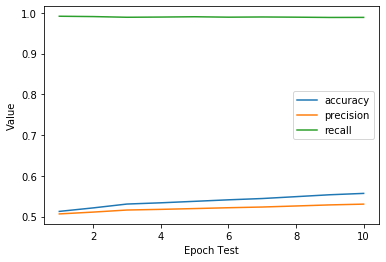

In [5]:
# Plot a graph of the metric(s) vs. epochs.
#list_of_metrics_to_plot = ['accuracy'] 
#print(hist_delta.head())
#list_of_metrics_to_plot = ['mean_absolute_error',"val_mean_absolute_error"] 
list_of_metrics_to_plot = ['accuracy', 'precision', 'recall'] 

plot_curve(epochs_run, hist, list_of_metrics_to_plot,"Test")


88/88 [==============================] - 0s 977us/step - loss: 0.7015 - accuracy: 0.5494 - precision: 0.5282 - recall: 0.9257


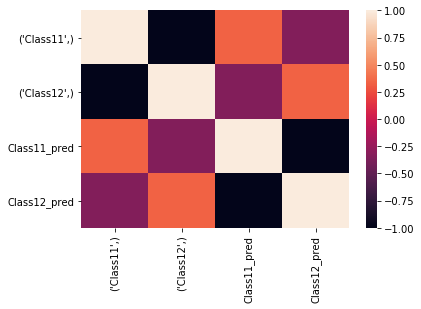

In [6]:
delta_test_result=test_model(my_model,df_test,all_class_features)

import seaborn as sn
import matplotlib.pyplot as plt


corr = delta_test_result.corr()
sn.heatmap(corr, annot=False)
plt.show()


In [7]:
delta_test_result.head(50)

,"(Class11,)","(Class12,)",Class11_pred,Class12_pred
0,0.0,1.0,0.251841,0.748159
1,0.0,1.0,0.002331,0.997669
2,0.0,1.0,0.006228,0.993772
3,0.0,1.0,0.505463,0.494537
4,0.0,1.0,0.465818,0.534182
5,1.0,0.0,0.640391,0.359609
6,0.0,1.0,0.432485,0.567515
7,0.0,1.0,0.494460,0.505540
8,1.0,0.0,0.540613,0.459387
9,0.0,1.0,0.369058,0.630942


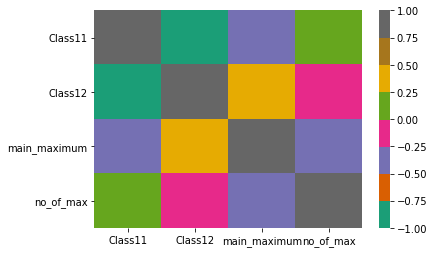

In [8]:
import seaborn as sn
import matplotlib.pyplot as plt



corr = df_train.corr()
sn.heatmap(corr, annot=False,cmap="Dark2")
plt.show()